In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import os
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("combined_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2"])
df1 = pd.read_csv("combined_data_score.csv", names=["score_pc1", "score_pc2","sample"])
df2 = pd.read_csv("/home/vikentiy/RStudio Data/Biochar Auger 500 /csv/AWB500C1.1", names=["wavenumber","intensity"])
df3 = pd.read_csv("/home/vikentiy/RStudio Data/Softwood Auger Raw (AWF)/csv/AWF1.1", names=["wavenumber","intensity"])
df4 = pd.read_csv("/home/vikentiy/RStudio Data/Biochar Auger 500 /csv/AWB500C1.1", names=["wavenumber","intensity"])
df5 = pd.read_csv("temp_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2", "loading_pc3",])
df6 = pd.read_csv("temp_data_score.csv", names=["score_pc1", "score_pc2", "score_pc3", "sample"])
df7 = pd.read_csv("crushed_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2", "loading_pc3"])
df8 = pd.read_csv("crushed_data_score.csv", names=["score_pc1", "score_pc2", "score_pc3", "sample"])
df9 = pd.read_csv("/home/vikentiy/RStudio Data/Atefe Furnace After (AFA)/csv/AFA1.1", names=["wavenumber","intensity"])
df10 = pd.read_csv("/home/vikentiy/RStudio Data/Atefe Furnace Before (AFB)/csv/AFB1.1", names=["wavenumber","intensity"])
df11 = pd.read_csv("raw_crab_biochar_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2"])
df12 = pd.read_csv("raw_crab_biochar_data_score.csv", names=["score_pc1", "score_pc2","sample"])
df13 = pd.read_csv("/home/vikentiy/RStudio Data/Dried Crab Raw (DCR)/csv/DCR1.1", names=["wavenumber","intensity"])
df14 = pd.read_csv("/home/vikentiy/RStudio Data/Crab Biochar (CB)/csv/CB1.1", names=["wavenumber","intensity"])
df15 = pd.read_csv("inorganic_biochar_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2"])
df16 = pd.read_csv("inorganic_biochar_data_score.csv", names=["score_pc1", "score_pc2","sample"])
df17 = pd.read_csv("crab_wood_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2"])
df18 = pd.read_csv("crab_wood_data_score.csv", names=["score_pc1", "score_pc2","sample"]) 
df19 = pd.read_csv("crab_method_data_load.csv", names=["wavenumber", "loading_pc1", "loading_pc2", "loading_pc3"])
df20 = pd.read_csv("crab_method_data_score.csv", names=["score_pc1", "score_pc2","score_pc3","sample"]) 
df21 = pd.read_csv("/home/vikentiy/RStudio Data/Hydrothermal Carbonization Biochar (HCB)/csv/HCB1.1", names=["wavenumber","intensity"])


# Need to remove the first entry which the name that is saved from R
df = df.drop(df.index[0])
df1 = df1.drop(df1.index[0])
df5 = df5.drop(df5.index[0])
df6 = df6.drop(df6.index[0])
df7 = df7.drop(df7.index[0])
df8 = df8.drop(df8.index[0])
df11 = df11.drop(df11.index[0])
df12 = df12.drop(df12.index[0])
df15 = df15.drop(df15.index[0])
df16 = df16.drop(df16.index[0])
df17 = df17.drop(df17.index[0])
df18 = df18.drop(df18.index[0])
df19 = df19.drop(df19.index[0])
df20 = df20.drop(df20.index[0])

In [3]:
# Convert columns to numeric
df['wavenumber'] = pd.to_numeric(df['wavenumber'], errors='coerce')
df['loading_pc1'] = pd.to_numeric(df['loading_pc1'], errors='coerce')
df['loading_pc2'] = pd.to_numeric(df['loading_pc2'], errors='coerce')

df5['wavenumber'] = pd.to_numeric(df5['wavenumber'], errors='coerce')
df5['loading_pc1'] = pd.to_numeric(df5['loading_pc1'], errors='coerce')
df5['loading_pc2'] = pd.to_numeric(df5['loading_pc2'], errors='coerce')
df5['loading_pc3'] = pd.to_numeric(df5['loading_pc3'], errors='coerce')
df7['wavenumber'] = pd.to_numeric(df7['wavenumber'], errors='coerce')
df7['loading_pc1'] = pd.to_numeric(df7['loading_pc1'], errors='coerce')
df7['loading_pc2'] = pd.to_numeric(df7['loading_pc2'], errors='coerce')
df7['loading_pc3'] = pd.to_numeric(df7['loading_pc3'], errors='coerce')
df11['wavenumber'] = pd.to_numeric(df11['wavenumber'], errors='coerce')
df11['loading_pc1'] = pd.to_numeric(df11['loading_pc1'], errors='coerce')
df11['loading_pc2'] = pd.to_numeric(df11['loading_pc2'], errors='coerce')
df15['wavenumber'] = pd.to_numeric(df15['wavenumber'], errors='coerce')
df15['loading_pc1'] = pd.to_numeric(df15['loading_pc1'], errors='coerce')
df15['loading_pc2'] = pd.to_numeric(df15['loading_pc2'], errors='coerce')
df17['wavenumber'] = pd.to_numeric(df17['wavenumber'], errors='coerce')
df17['loading_pc1'] = pd.to_numeric(df17['loading_pc1'], errors='coerce')
df17['loading_pc2'] = pd.to_numeric(df17['loading_pc2'], errors='coerce')
df19['wavenumber'] = pd.to_numeric(df19['wavenumber'], errors='coerce')
df19['loading_pc1'] = pd.to_numeric(df19['loading_pc1'], errors='coerce')
df19['loading_pc2'] = pd.to_numeric(df19['loading_pc2'], errors='coerce')
df19['loading_pc3'] = pd.to_numeric(df19['loading_pc3'], errors='coerce')

# Check the data types of the columns
print(df19.dtypes)

wavenumber     float64
loading_pc1    float64
loading_pc2    float64
loading_pc3    float64
dtype: object


# Raw vs Biochar Auger and Crab

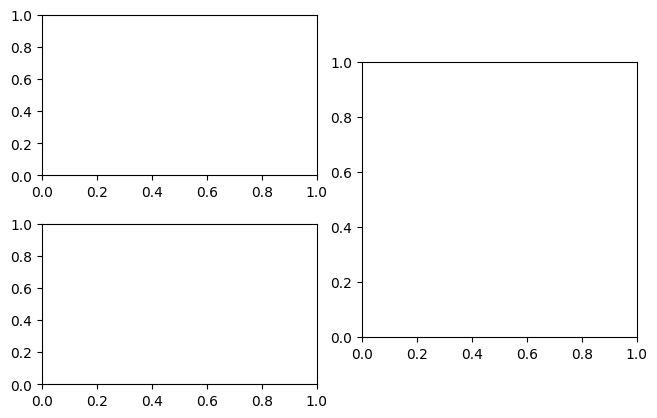

In [4]:
fig9 = plt.figure(constrained_layout=False)

# Left plots
gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48, hspace=0.3)  # Increased vertical spacing
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.98)
f9_ax3 = fig9.add_subplot(gs2[0, :], aspect='equal')

# Adjust plot positions and labels

plt.show()


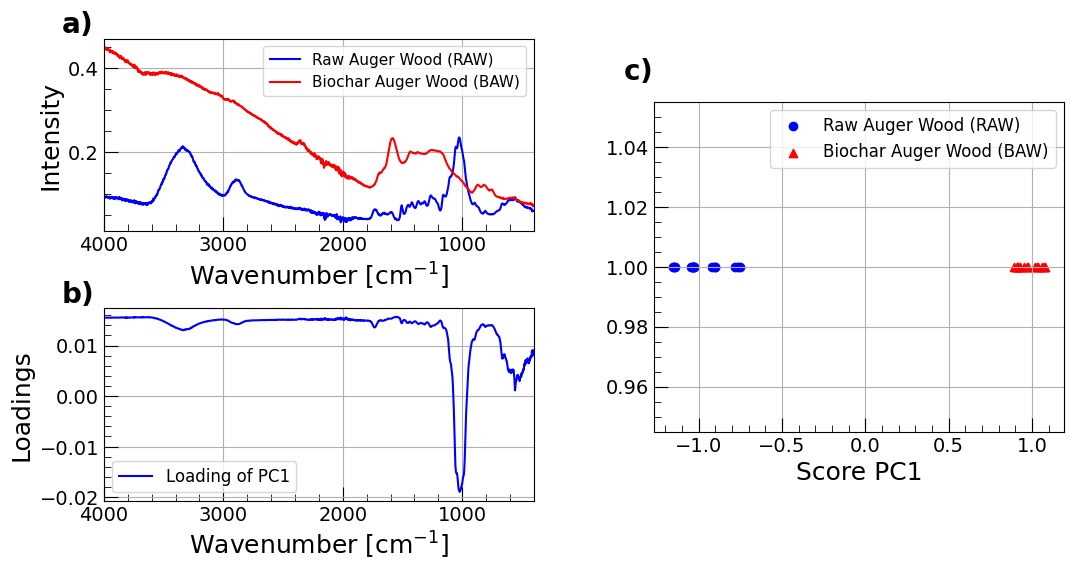

In [68]:
# Define marker styles and colors
marker_styles = ['o', '^']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Create figure with gridspec
fig9 = plt.figure(constrained_layout=False, figsize=(10, 6))  # Adjusted figure size
#fig9 = plt.figure(constrained_layout=False, figsize=(8, 8))  # Adjusted figure size
gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.02, right=0.45, wspace=0.2, hspace=0.4)  # Left plots
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.57, right=0.98, top=0.80, bottom=0.20)  # Right plot

# Left plots
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
f9_ax3 = fig9.add_subplot(gs2[0, :])
f9_ax3.set_aspect(aspect=18)  # Make the right plot square

# Plot Loadings of PC1 and PC2 for subplot a)
f9_ax2.plot(df['wavenumber'][::1], df['loading_pc1'][::1], color='blue', label="Loading of PC1")
# f9_ax2.plot(df['wavenumber'][::1], df['loading_pc2'][::1], color='red', label="Loading of PC2")
f9_ax2.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax2.set_ylabel('Loadings', fontsize=18)
f9_ax2.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax2.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax2.minorticks_on()  # Enable minor ticks
f9_ax2.legend(fontsize=12)
f9_ax2.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax2.grid(True)
f9_ax2.set_xlim(4000,400)
f9_ax2.text(-0.1, 1, r'$\mathbf{b)}$', transform=f9_ax2.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot Raw and Biochar Intensity for subplot b)
f9_ax1.plot(df3['wavenumber'][::1], df3['intensity'][::1], color='blue', label="Raw Auger Wood (RAW)")
f9_ax1.plot(df4['wavenumber'][::1], df4['intensity'][::1], color='red', label="Biochar Auger Wood (BAW)")
f9_ax1.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax1.set_ylabel('Intensity', fontsize=18)
f9_ax1.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax1.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax1.minorticks_on()  # Enable minor ticks
f9_ax1.legend(fontsize=11)
f9_ax1.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax1.grid(True)
f9_ax1.set_xlim(4000,400)
f9_ax1.text(-0.1, 1, r'$\mathbf{a)}$', transform=f9_ax1.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot scores for subplot c)
color_label_mapping = {'blue': 'Raw Auger Wood (RAW)', 'red': 'Biochar Auger Wood (BAW)'}  # Custom label names based on colors
for i, sample_name in enumerate(df1['sample'].unique()):
    sample_data = df1[df1['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]
    color = colors[i % len(colors)]
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    f9_ax3.scatter(sample_data['score_pc1'], [1] * len(sample_data), label=label, marker=marker, color=color)  # Change made here
    
f9_ax3.set_xlabel('Score PC1', fontsize=18)
f9_ax3.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax3.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax3.minorticks_on()  # Enable minor ticks
f9_ax3.legend(fontsize=12)
f9_ax3.grid(True) 

f9_ax3.text(-0.075, 1.05, r'$\mathbf{c)}$', transform=f9_ax3.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

plt.savefig('PC Scores + Load Raw and Biochar Auger.pdf', dpi=600, bbox_inches='tight')
#plt.savefig('PC Scores + Load Raw and Biochar Auger.jpg', dpi=600, bbox_inches='tight')

plt.show()

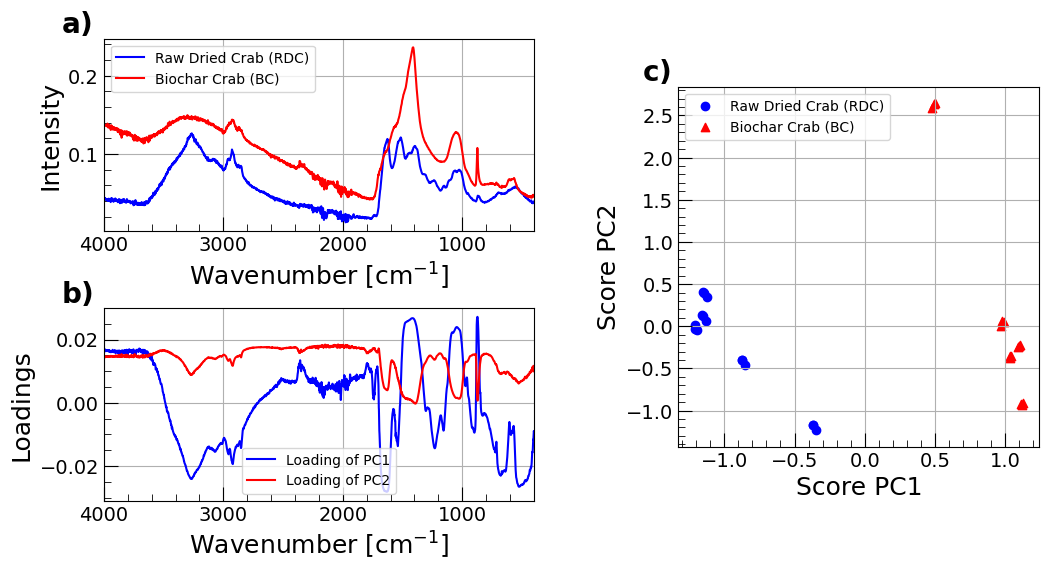

In [69]:
# Define marker styles and colors
marker_styles = ['o', '^']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Create figure with gridspec
fig9 = plt.figure(constrained_layout=False, figsize=(10, 6))  # Adjusted figure size
#fig9 = plt.figure(constrained_layout=False, figsize=(8, 8))  # Adjusted figure size

gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.02, right=0.45, wspace=0.2, hspace=0.4)  # Left plots
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.57, right=0.98, top=0.80, bottom=0.20)  # Right plot

# Left plots
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
f9_ax3 = fig9.add_subplot(gs2[0, :])
f9_ax3.set_aspect(aspect=0.6)  # Make the right plot square

# Plot Loadings of PC1 and PC2 for subplot a)
f9_ax2.plot(df11['wavenumber'][::1], df11['loading_pc1'][::1], color='blue', label="Loading of PC1")
f9_ax2.plot(df11['wavenumber'][::1], df11['loading_pc2'][::1], color='red', label="Loading of PC2")
f9_ax2.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax2.set_ylabel('Loadings', fontsize=18)
f9_ax2.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax2.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax2.minorticks_on()  # Enable minor ticks
f9_ax2.legend(fontsize=10)
f9_ax2.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax2.grid(True)
f9_ax2.set_xlim(4000,400)
f9_ax2.text(-0.1, 1, r'$\mathbf{a)}$', transform=f9_ax1.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot Raw and Biochar Intensity for subplot b)
f9_ax1.plot(df13['wavenumber'][::1], df13['intensity'][::1], color='blue', label="Raw Dried Crab (RDC)")
f9_ax1.plot(df14['wavenumber'][::1], df14['intensity'][::1], color='red', label="Biochar Crab (BC)")
f9_ax1.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax1.set_ylabel('Intensity', fontsize=18)
f9_ax1.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax1.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax1.minorticks_on()  # Enable minor ticks
f9_ax1.legend(fontsize=10)
f9_ax1.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax1.grid(True)
f9_ax1.set_xlim(4000,400)
f9_ax1.text(-0.1, 1, r'$\mathbf{b)}$', transform=f9_ax2.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot scores for subplot c)
color_label_mapping = {'blue': 'Raw Dried Crab (RDC)', 'red': 'Biochar Crab (BC)'}  # Custom label names based on colors
for i, sample_name in enumerate(df12['sample'].unique()):
    sample_data = df12[df12['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]
    color = colors[i % len(colors)]
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    f9_ax3.scatter(sample_data['score_pc1'], sample_data['score_pc2'], label=label, marker=marker, color=color)

# Set labels and properties
f9_ax3.set_xlabel('Score PC1', fontsize=18)
f9_ax3.set_ylabel('Score PC2', fontsize=18)
f9_ax3.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax3.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax3.minorticks_on()  # Enable minor ticks
f9_ax3.legend(fontsize=10, loc='upper left')
f9_ax3.grid(True)
f9_ax3.text(-0.1, 1.00, r'$\mathbf{c)}$', transform=f9_ax3.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

plt.savefig('PC Scores + Load Raw and Biochar Crab.pdf', dpi=600, bbox_inches='tight')
#plt.savefig('PC Scores + Load Raw and Biochar Crab.jpg', dpi=600, bbox_inches='tight')

plt.show()

In [29]:
def remove_outliers_2D(df, sample_name):
    # Select dataset based on sample name
    sample_data = df[df['sample'] == sample_name]

    # Compute mean and covariance matrix for the selected dataset
    sample_mean = sample_data[['score_pc1', 'score_pc2']].mean()
    sample_cov = sample_data[['score_pc1', 'score_pc2']].cov()

    # Ensure that the covariance matrix is positive definite
    if np.linalg.matrix_rank(sample_cov) == min(sample_cov.shape):
        # Calculate Mahalanobis distance for each data point
        diff = sample_data[['score_pc1', 'score_pc2']] - sample_mean
        inv_cov = np.linalg.inv(sample_cov)
        mahalanobis_dist = np.sqrt(np.sum(np.dot(diff, inv_cov) * diff, axis=1))

        # Set a threshold for identifying outliers
        threshold = np.percentile(mahalanobis_dist, 85)

        # Identify outliers
        outliers = mahalanobis_dist > threshold

        # Filter out outliers
        sample_filtered_data = sample_data[~outliers]
        
        print("Number of outliers removed from", sample_name, ":", sum(outliers))
        
        return sample_filtered_data
    else:
        print("Covariance matrix is not positive definite for", sample_name)
        return None

# Example usage:
# Call the function with your DataFrame (df1) and the sample name

# Different Chemistry Analysis

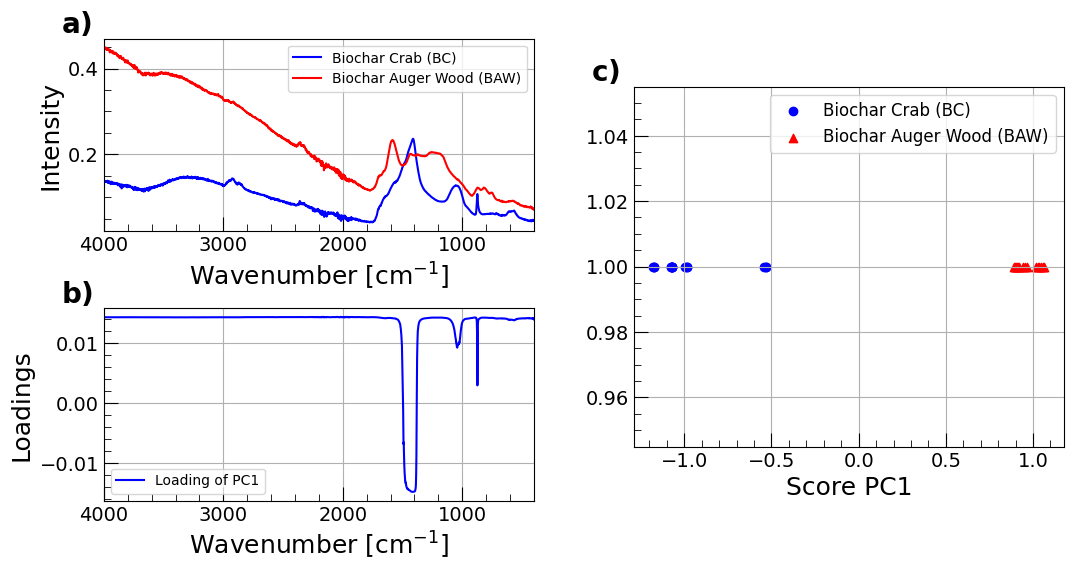

In [70]:
# Define marker styles and colors
marker_styles = ['o', '^']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Create figure with gridspec
fig9 = plt.figure(constrained_layout=False, figsize=(10, 6))  # Adjusted figure size
gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.02, right=0.45, wspace=0.2, hspace=0.4)  # Left plots
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.98, top=0.80, bottom=0.20)  # Right plot

# Left plots
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
f9_ax3 = fig9.add_subplot(gs2[0, :])

# Plot Loadings of PC1 and PC2 for subplot a)
f9_ax2.plot(df15['wavenumber'][::1], df15['loading_pc1'][::1], color='blue', label="Loading of PC1")
#f9_ax2.plot(df15['wavenumber'][::1], df15['loading_pc2'][::1], color='red', label="Loading of PC2")
f9_ax2.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax2.set_ylabel('Loadings', fontsize=18)
f9_ax2.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax2.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax2.minorticks_on()  # Enable minor ticks
f9_ax2.legend(fontsize=10)
f9_ax2.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax2.grid(True)
f9_ax2.set_xlim(4000,400)
f9_ax2.text(-0.1, 1, r'$\mathbf{a)}$', transform=f9_ax1.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot Raw and Biochar Intensity for subplot b)
f9_ax1.plot(df14['wavenumber'][::1], df14['intensity'][::1], color='blue', label="Biochar Crab (BC)")
f9_ax1.plot(df4['wavenumber'][::1], df4['intensity'][::1], color='red', label="Biochar Auger Wood (BAW)")
f9_ax1.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax1.set_ylabel('Intensity', fontsize=18)
f9_ax1.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax1.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax1.minorticks_on()  # Enable minor ticks
f9_ax1.legend(fontsize=10)
f9_ax1.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax1.grid(True)
f9_ax1.set_xlim(4000,400)
f9_ax1.text(-0.1, 1, r'$\mathbf{b)}$', transform=f9_ax2.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot scores for subplot c)
color_label_mapping = {'red': 'Biochar Auger Wood (BAW)', 'blue': 'Biochar Crab (BC)'}  # Custom label names based on colors

# Group samples by name and plot them with the same shape and color for each group
unique_samples = df16['sample'].unique()
num_samples = len(unique_samples)
for i, sample_name in enumerate(unique_samples):
    sample_data = df16[df16['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]
    color = colors[i % len(colors)]
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color mapping
    f9_ax3.scatter(sample_data['score_pc1'], [1] * len(sample_data), label=label, marker=marker, color=color)

f9_ax3.set_xlabel('Score PC1', fontsize=18)
f9_ax3.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax3.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax3.minorticks_on()  # Enable minor ticks
f9_ax3.legend(fontsize=12)
f9_ax3.grid(True)
f9_ax3.text(-0.1, 1.0, r'$\mathbf{c)}$', transform=f9_ax3.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

plt.savefig('Inorganic Loadings vs Original + Score Auger and Crab Biochar.pdf', dpi=600, bbox_inches='tight')
plt.savefig('Inorganic Loadings vs Original + Score Auger and Crab Biochar.jpg', dpi=600, bbox_inches='tight')
plt.show()


# Raw and Biochar Different Chemistries

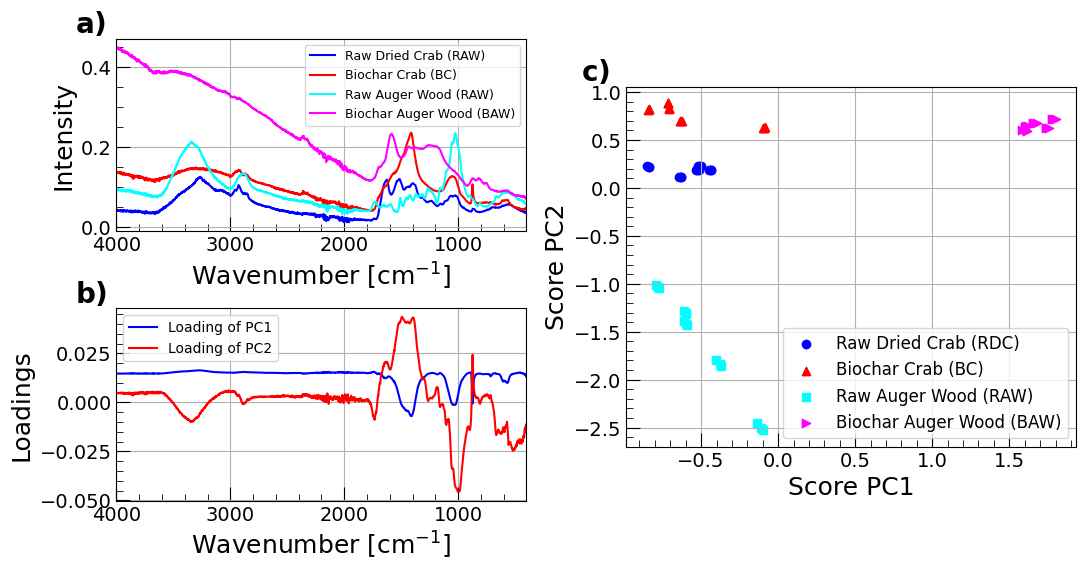

In [71]:
# Define marker styles and colors
marker_styles = ['o', '^']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Create figure with gridspec
fig9 = plt.figure(constrained_layout=False, figsize=(10, 6))  # Adjusted figure size
gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.02, right=0.43, wspace=0.2, hspace=0.4)  # Left plots
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.53, right=0.98, top=0.80, bottom=0.20)  # Right plot

# Left plots
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
f9_ax3 = fig9.add_subplot(gs2[0, :])

# Plot Loadings of PC1 and PC2 for subplot a)
f9_ax2.plot(df17['wavenumber'][::1], df17['loading_pc1'][::1], color='blue', label="Loading of PC1")
f9_ax2.plot(df17['wavenumber'][::1], df17['loading_pc2'][::1], color='red', label="Loading of PC2")
f9_ax2.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax2.set_ylabel('Loadings', fontsize=18)
f9_ax2.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax2.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax2.minorticks_on()  # Enable minor ticks
f9_ax2.legend(fontsize=10)
f9_ax2.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax2.grid(True)
f9_ax2.set_xlim(4000, 400)
f9_ax2.text(-0.1, 1, r'$\mathbf{a)}$', transform=f9_ax1.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot Raw and Biochar Intensity for subplot b)
f9_ax1.plot(df13['wavenumber'][::1], df13['intensity'][::1], color='blue', label="Raw Dried Crab (RAW)")
f9_ax1.plot(df14['wavenumber'][::1], df14['intensity'][::1], color='red', label="Biochar Crab (BC)")
f9_ax1.plot(df3['wavenumber'][::1], df3['intensity'][::1], color='cyan', label="Raw Auger Wood (RAW)")
f9_ax1.plot(df4['wavenumber'][::1], df4['intensity'][::1], color='magenta', label="Biochar Auger Wood (BAW)")
f9_ax1.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax1.set_ylabel('Intensity', fontsize=18)
f9_ax1.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax1.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax1.minorticks_on()  # Enable minor ticks
f9_ax1.legend(fontsize=9)
f9_ax1.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax1.grid(True)
f9_ax1.set_xlim(4000, 400)
f9_ax1.text(-0.1, 1, r'$\mathbf{b)}$', transform=f9_ax2.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Define marker styles and colors
marker_styles = ['o', '^', 's', '>']  # you can add more marker styles if needed
colors = ['blue', 'red', 'cyan', 'magenta']  # you can add more colors if needed

# Group samples by name and plot them with the same shape and color for each group
color_label_mapping = {'blue': 'Raw Dried Crab (RDC)', 'red': 'Biochar Crab (BC)', 'cyan': 'Raw Auger Wood (RAW)', 'magenta': 'Biochar Auger Wood (BAW)'}
unique_samples = df18['sample'].unique()
num_samples = len(unique_samples)
for i, sample_name in enumerate(unique_samples):
    sample_data = df18[df18['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]  # Cycle through marker styles
    color = colors[i % len(colors)]  # Cycle through colors
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    f9_ax3.scatter(sample_data['score_pc1'], sample_data['score_pc2'], label=label, color=color, marker=marker)

f9_ax3.set_xlabel('Score PC1', fontsize=18)
f9_ax3.set_ylabel('Score PC2', fontsize=18)
f9_ax3.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax3.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax3.minorticks_on()  # Enable minor ticks
f9_ax3.legend(fontsize=12)
f9_ax3.grid(True)
f9_ax3.text(-0.1, 1.0, r'$\mathbf{c)}$', transform=plt.gca().transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

plt.savefig('Combined Loadings vs Original + Score Auger and Crab.pdf', dpi=600, bbox_inches='tight')
plt.savefig('Combined Loadings vs Original + Score Auger and Crab.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [10]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df18[['score_pc1', 'score_pc2']])

# Transform your data
scaled_data_df18 = scaler.transform(df18[['score_pc1', 'score_pc2']])

# Applying K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=66)
kmeans_labels_df18 = kmeans.fit_predict(scaled_data_df18)

# Creating a new DataFrame to store cluster labels
clustered_df18 = df18.copy()
clustered_df18['kmeans_labels'] = kmeans_labels_df18

/home/vikentiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78e3b2c9c3a0>
Traceback (most recent call last):
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vikentiy/anacon

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78e3b2c9c3a0>
Traceback (most recent call last):
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.

In [11]:
wood1_biochar_filtered_data = remove_outliers_2D(df18, 'AWB')
crab1_biochar_filtered_data = remove_outliers_2D(df18, 'CB')
raw_wood1_filtered_data = remove_outliers_2D(df18, 'AWF')
raw_crab1_filtered_data = remove_outliers_2D(df18, 'DCR')

Number of outliers removed from AWB : 3
Number of outliers removed from CB : 3
Number of outliers removed from AWF : 3
Number of outliers removed from DCR : 3


In [12]:
# Combine the filtered datasets
combined_data_all = pd.concat([ raw_crab1_filtered_data, crab1_biochar_filtered_data, raw_wood1_filtered_data, wood1_biochar_filtered_data], ignore_index=True)

# Remove any rows with None values
combined_data_all = combined_data_all.dropna()

# Apply standard scaling to the combined data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data_all[['score_pc1', 'score_pc2']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=66)
kmeans.fit(scaled_data)
combined_data_all['kmeans_labels'] = kmeans.labels_

/home/vikentiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78e3b0409c60>
Traceback (most recent call last):
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vikentiy/anacon

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x78e3b3e54ca0>
Traceback (most recent call last):
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vikentiy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.

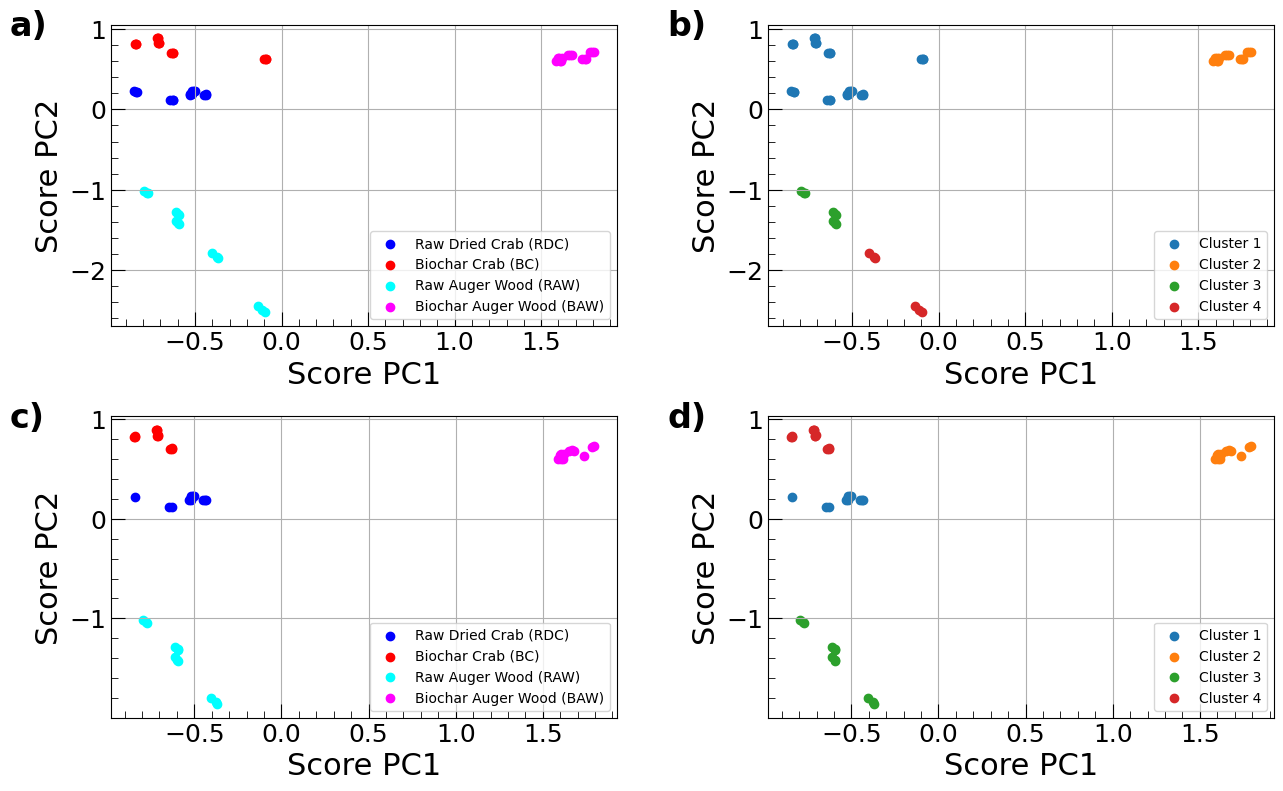

In [72]:
# Plotting routine
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Define marker styles and colors
marker_styles = ['o']  # you can add more marker styles if needed
colors = ['blue', 'red', 'cyan', 'magenta']  # you can add more colors if needed
color_label_mapping = {'blue': 'Raw Dried Crab (RDC)', 'red': 'Biochar Crab (BC)', 'cyan': 'Raw Auger Wood (RAW)', 'magenta': 'Biochar Auger Wood (BAW)'}

# Plot scatter plot of original df18 DataFrame without clusters
unique_samples_df18 = df18['sample'].unique()
for i, sample_name in enumerate(unique_samples_df18):
    sample_data = df18[df18['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]
    color = colors[i % len(colors)]
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    axs[0, 0].scatter(sample_data['score_pc1'], sample_data['score_pc2'], label=label, marker=marker, color=color)

axs[0, 0].set_xlabel('Score PC1', fontsize=22)
axs[0, 0].set_ylabel('Score PC2', fontsize=22)
axs[0, 0].tick_params(axis='both', which='major', labelsize=18, length=10, direction='in')
axs[0, 0].tick_params(axis='both', which='minor', length=5, direction='in')
axs[0, 0].minorticks_on()  # Enable minor ticks
axs[0, 0].legend(fontsize=16)
axs[0, 0].grid(True)
axs[0, 0].legend(loc='lower right')

# Get unique cluster labels and sort them
unique_labels = sorted(clustered_df18['kmeans_labels'].unique())

# Plot scatter plot of original df18 DataFrame with clusters
for label in unique_labels:
    cluster_data = clustered_df18[clustered_df18['kmeans_labels'] == label]
    axs[0, 1].scatter(cluster_data['score_pc1'], cluster_data['score_pc2'], label=f'Cluster {label+1}')

axs[0, 1].set_xlabel('Score PC1', fontsize=22)
axs[0, 1].set_ylabel('Score PC2', fontsize=22)
axs[0, 1].tick_params(axis='both', which='major', labelsize=18, length=10, direction='in')
axs[0, 1].tick_params(axis='both', which='minor', length=5, direction='in')
axs[0, 1].minorticks_on()  # Enable minor ticks
axs[0, 1].legend(fontsize=16)
axs[0, 1].grid(True)
axs[0, 1].legend(loc='lower right')

# Plot scatter plot of combined_data_all DataFrame without clusters
unique_samples_combined = combined_data_all['sample'].unique()
for i, sample_name in enumerate(unique_samples_combined):
    sample_data = combined_data_all[combined_data_all['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]
    color = colors[i % len(colors)]
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    axs[1, 0].scatter(sample_data['score_pc1'], sample_data['score_pc2'], label=label, marker=marker, color=color)

axs[1, 0].set_xlabel('Score PC1', fontsize=22)
axs[1, 0].set_ylabel('Score PC2', fontsize=22)
axs[1, 0].tick_params(axis='both', which='major', labelsize=18, length=10, direction='in')
axs[1, 0].tick_params(axis='both', which='minor', length=5, direction='in')
axs[1, 0].minorticks_on()  # Enable minor ticks
axs[1, 0].legend(fontsize=16)
axs[1, 0].grid(True)
axs[1, 0].legend(loc='lower right')

# Get unique cluster labels and sort them
unique_labels = sorted(combined_data_all['kmeans_labels'].unique())

# Plot scatter plot of outliers removed DataFrame with clusters
for label in unique_labels:
    cluster_data = combined_data_all[combined_data_all['kmeans_labels'] == label]
    axs[1, 1].scatter(cluster_data['score_pc1'], cluster_data['score_pc2'], label=f'Cluster {label+1}')

axs[1, 1].set_xlabel('Score PC1', fontsize=22)
axs[1, 1].set_ylabel('Score PC2', fontsize=22)
axs[1, 1].tick_params(axis='both', which='major', labelsize=18, length=10, direction='in')
axs[1, 1].tick_params(axis='both', which='minor', length=5, direction='in')
axs[1, 1].minorticks_on()  # Enable minor ticks
axs[1, 1].legend(fontsize=16)
axs[1, 1].grid(True)
axs[1, 1].legend(loc='lower right')

# Add label to each subplot
axs[0, 0].text(-0.2, 1.05, 'a)', transform=axs[0, 0].transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
axs[0, 1].text(-0.2, 1.05, 'b)', transform=axs[0, 1].transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
axs[1, 0].text(-0.2, 1.05, 'c)', transform=axs[1, 0].transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
axs[1, 1].text(-0.2, 1.05, 'd)', transform=axs[1, 1].transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig('Combined K-mean clustering All Samples outliers analysis.pdf', dpi=600, bbox_inches='tight')
plt.savefig('Combined K-mean clustering All Samples outliers analysis.jpg', dpi=600, bbox_inches='tight')

plt.show()


# Temperature Analysis

## 2D

In [63]:
# Mapping dictionaries for temperature and exposure
temperature_mapping = {
    'H1.': '220C',
    'H3.': '220C',
    'H4.': '220C',
    'H5.': '260C',
    'H6.': '180C',
    'H7.': '180C',
    'H8.': '220C',
    'H9.': '180C',
    'H10': '260C',
    'H11': '220C',
    'H12': '220C',
    'H13': '220C',
    'H14': '260C',
    'H15': '180C',
    # Add more mappings as needed
}

exposure_mapping = {
    'H1.': '1.75',
    'H3.': '0.5',
    'H4.': '3',
    'H5.': '3',
    'H6.': '3',
    'H7.': '0.5',
    'H8.': '0.5',
    'H9.': '1.75',
    'H10': '1.75',
    'H11': '1.75',
    'H12': '3',
    'H13': '1.75',
    'H14': '0.5',
    'H15': '1.75',
    # Add more mappings as needed
}

# Add 'temperature' and 'exposure' columns to df6 based on mappings
df6['temperature'] = df6['sample'].map(temperature_mapping)
df6['exposure'] = df6['sample'].map(exposure_mapping)

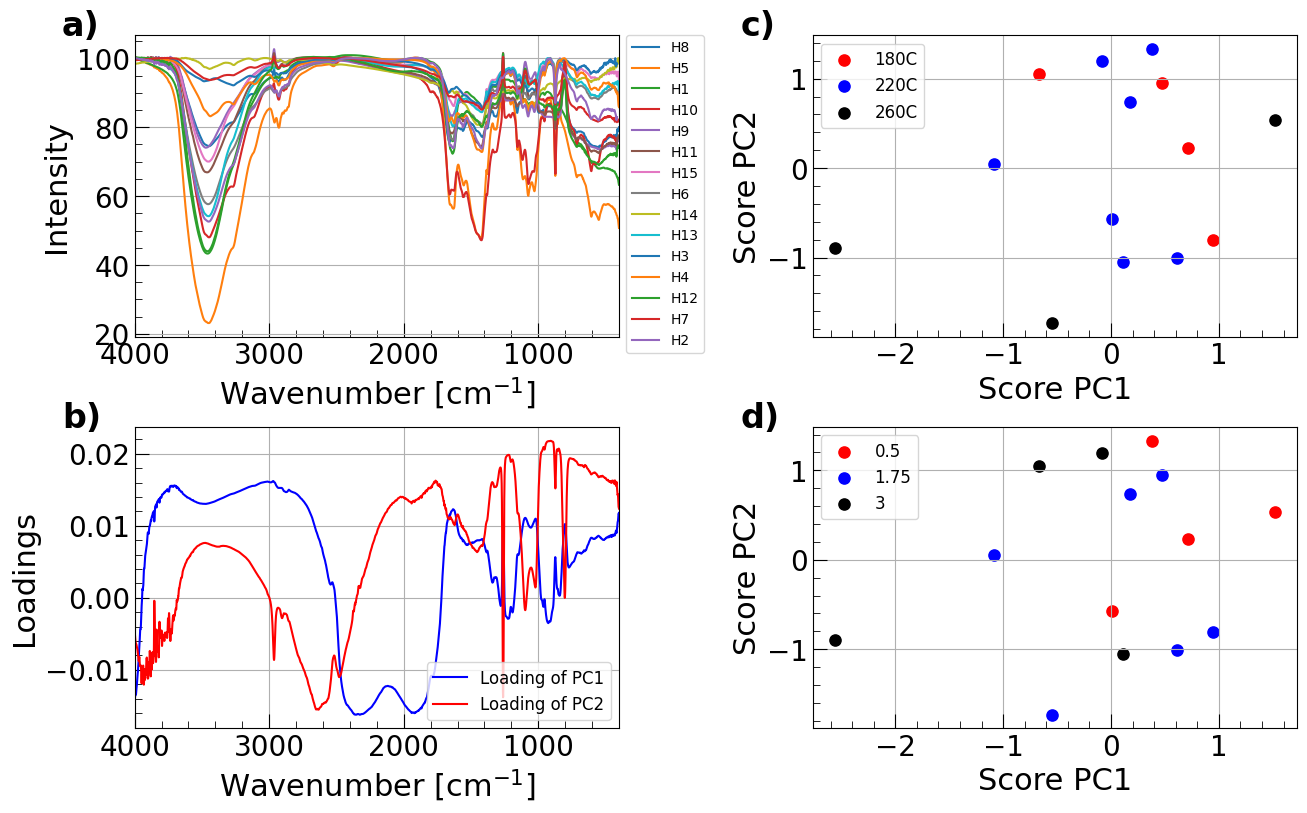

In [73]:
# Directory containing CSV files
directory = "/home/vikentiy/RStudio Data/Hydrothermal Carbonization Crab"

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Define temperature and exposure colors
temperature_colors = {'180C': 'red', '220C': 'blue', '260C': 'black'}
exposure_colors = {'0.5': 'red', '1.75': 'blue', '3.00': 'black'}

# Create a single figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot H13 Temperature Analysis Loadings in bottom left
axes[1, 0].plot(df5['wavenumber'][::-1], df5['loading_pc1'][::-1], color='blue', label="Loading of PC1")
axes[1, 0].plot(df5['wavenumber'][::-1], df5['loading_pc2'][::-1], color='red', label="Loading of PC2")
axes[1, 0].set_xlabel('Wavenumber [cm$^{-1}]$', fontsize=22)
axes[1, 0].set_ylabel('Loadings', fontsize=22)
axes[1, 0].tick_params(axis='both', which='major', labelsize=20, length=10, direction='in')
axes[1, 0].tick_params(axis='both', which='minor', length=5, direction='in')  # Hide tick labels for minor ticks
axes[1, 0].legend(fontsize=12, loc='lower right')
axes[1, 0].invert_xaxis()  # Invert x-axis to go from 4000 to 400
axes[1, 0].grid(True)
axes[1, 0].text(-0.15, 1.0, 'b)', transform=axes[1, 0].transAxes, fontsize=24, fontweight='bold')
axes[1, 0].minorticks_on()  # Enable minor ticks
axes[1, 0].set_xlim(4000, 400)

# Plot H13 PC Scores with Temperature in top right
for temperature, group in df6.groupby('temperature'):
    color = temperature_colors.get(temperature, 'black')
    axes[0, 1].scatter(group['score_pc1'], group['score_pc2'], label=temperature, s=65, color=color)

#     # Add sample names next to data points
#     for _, row in group.iterrows():
#         axes[0, 1].text(row['score_pc1'], row['score_pc2'], row['sample'], fontsize=14, color='black')

axes[0, 1].set_xlabel('Score PC1', fontsize=22)
axes[0, 1].set_ylabel('Score PC2', fontsize=22)
axes[0, 1].tick_params(axis='both', which='major', labelsize=20, length=10, direction='in')
axes[0, 1].tick_params(axis='both', which='minor', length=5, direction='in')  # Hide tick labels for minor ticks
axes[0, 1].grid(True)
axes[0, 1].legend(fontsize=12, loc='upper left')
axes[0, 1].text(-0.15, 1.0, 'c)', transform=axes[0, 1].transAxes, fontsize=24, fontweight='bold')
axes[0, 1].minorticks_on()  # Enable minor ticks

# Plot H13 PC Scores with Exposure in bottom right
for exposure, group in df6.groupby('exposure'):
    color = exposure_colors.get(exposure, 'black')
    axes[1, 1].scatter(group['score_pc1'], group['score_pc2'], label=exposure, s=65, color=color)

#     # Add sample names next to data points
#     for _, row in group.iterrows():
#         axes[1, 1].text(row['score_pc1'], row['score_pc2'], row['sample'], fontsize=14, color='black')

axes[1, 1].set_xlabel('Score PC1', fontsize=22)
axes[1, 1].set_ylabel('Score PC2', fontsize=22)
axes[1, 1].tick_params(axis='both', which='major', labelsize=20, length=10, direction='in')
axes[1, 1].tick_params(axis='both', which='minor', length=5, direction='in')  # Hide tick labels for minor ticks
axes[1, 1].grid(True)
axes[1, 1].legend(fontsize=12, loc='upper left')
axes[1, 1].text(-0.15, 1.0, 'd)', transform=axes[1, 1].transAxes, fontsize=24, fontweight='bold')
axes[1, 1].minorticks_on()  # Enable minor ticks


for i, file in enumerate(csv_files):
    dft = pd.read_csv(os.path.join(directory, file))
    color = plt.cm.tab10(i % 10)  # Modulo to cycle through available colors
    axes[0, 0].plot(dft.iloc[:, 0], dft.iloc[:, 1], linestyle='-', color=color, label=file.split('.')[0])
    
axes[0, 0].set_ylabel("Intensity", fontsize=22)
axes[0, 0].set_xlabel("Wavenumber [cm$^{-1}]$", fontsize=22)
axes[0, 0].tick_params(axis='both', which='major', labelsize=20, length=10, direction='in')
axes[0, 0].tick_params(axis='both', which='minor', length=5, direction='in')  # Hide tick labels for minor ticks
axes[0, 0].invert_xaxis()
axes[0, 0].grid(True)
axes[0, 0].legend(fontsize=10, bbox_to_anchor=(1, 1.025), loc='upper left')
axes[0, 0].text(-0.15, 1.00, 'a)', transform=axes[0, 0].transAxes, fontsize=24, fontweight='bold')
axes[0, 0].minorticks_on()  # Enable minor ticks
axes[0, 0].set_xlim(4000, 400)


plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.savefig('H13 All.pdf', dpi=600, bbox_inches='tight')
plt.savefig('H13 All.jpg', dpi=600, bbox_inches='tight')

plt.show()

# Crushed Analysis

## 2D

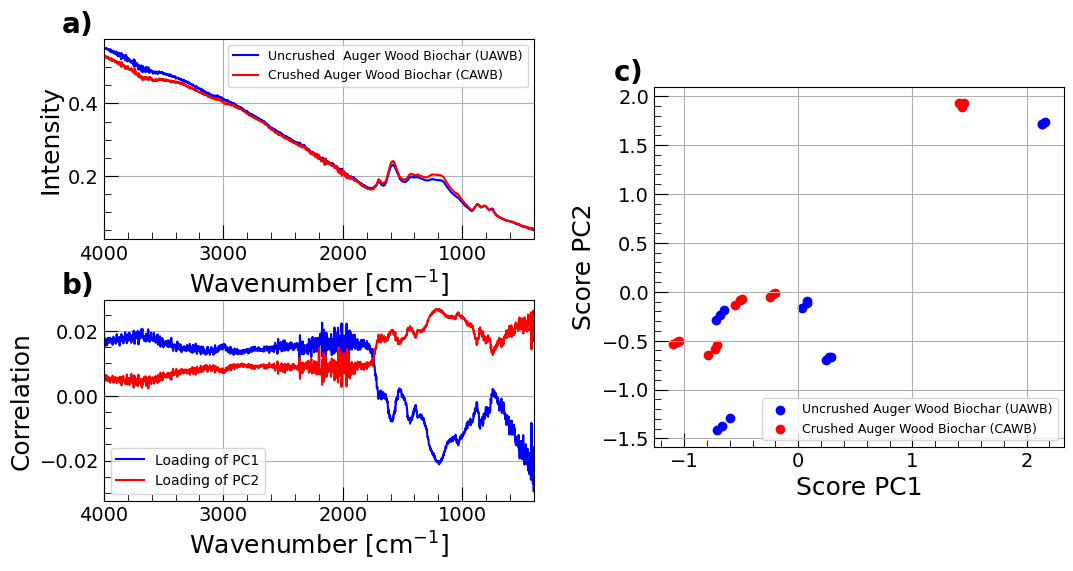

In [74]:
# Define marker styles and colors
marker_styles = ['o', '^']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Create figure with gridspec
fig9 = plt.figure(constrained_layout=False, figsize=(10, 6))  # Adjusted figure size
gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.02, right=0.45, wspace=0.2, hspace=0.3)  # Left plots
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.57, right=0.98, top=0.80, bottom=0.20)  # Right plot

# Left plots
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
f9_ax3 = fig9.add_subplot(gs2[0, :])

# Plot Loadings of PC1 and PC2 for subplot a)
f9_ax2.plot(df7['wavenumber'][::1], df7['loading_pc1'][::1], color='blue', label="Loading of PC1")
f9_ax2.plot(df7['wavenumber'][::1], df7['loading_pc2'][::1], color='red', label="Loading of PC2")
f9_ax2.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax2.set_ylabel('Correlation', fontsize=18)
f9_ax2.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax2.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax2.minorticks_on()  # Enable minor ticks
f9_ax2.legend(fontsize=10)
f9_ax2.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax2.grid(True)
f9_ax2.set_xlim(4000, 400)
f9_ax2.text(-0.1, 1, r'$\mathbf{a)}$', transform=f9_ax1.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot Raw and Biochar Intensity for subplot b)
f9_ax1.plot(df10['wavenumber'][::1], df10['intensity'][::1], color='blue', label="Uncrushed  Auger Wood Biochar (UAWB)")
f9_ax1.plot(df9['wavenumber'][::1], df9['intensity'][::1], color='red', label="Crushed Auger Wood Biochar (CAWB)")
f9_ax1.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax1.set_ylabel('Intensity', fontsize=18)
f9_ax1.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax1.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax1.minorticks_on()  # Enable minor ticks
f9_ax1.legend(fontsize=9)
f9_ax1.invert_xaxis()  #Invert x-axis to go from 4000 to 400
f9_ax1.grid(True)
f9_ax1.set_xlim(4000, 400)
f9_ax1.text(-0.1, 1, r'$\mathbf{b)}$', transform=f9_ax2.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Define marker styles and colors
marker_styles = ['o']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Group samples by name and plot them with the same shape and color for each group
color_label_mapping = {'blue': 'Uncrushed Auger Wood Biochar (UAWB)', 'red': 'Crushed Auger Wood Biochar (CAWB)'}
unique_samples = df8['sample'].unique()
num_samples = len(unique_samples)
for i, sample_name in enumerate(unique_samples):
    sample_data = df8[df8['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]  # Cycle through marker styles
    color = colors[i % len(colors)]  # Cycle through colors
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    plt.scatter(sample_data['score_pc1'], sample_data['score_pc2'], label=label, color=color, marker=marker)

f9_ax3.set_xlabel('Score PC1', fontsize=18)
f9_ax3.set_ylabel('Score PC2', fontsize=18)
f9_ax3.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax3.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax3.minorticks_on()  # Enable minor ticks
f9_ax3.legend(fontsize=9, loc='lower right')
f9_ax3.grid(True)
f9_ax3.text(-0.1, 1.0, r'$\mathbf{c)}$', transform=f9_ax3.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

plt.savefig('PC Loadings + Score for Crushed and Uncrushed Auger Biochar.pdf', dpi=600, bbox_inches='tight')
plt.savefig('PC Loadings + Score for Crushed and Uncrushed Auger Biochar.jpg', dpi=600, bbox_inches='tight')
plt.show()

## 2D

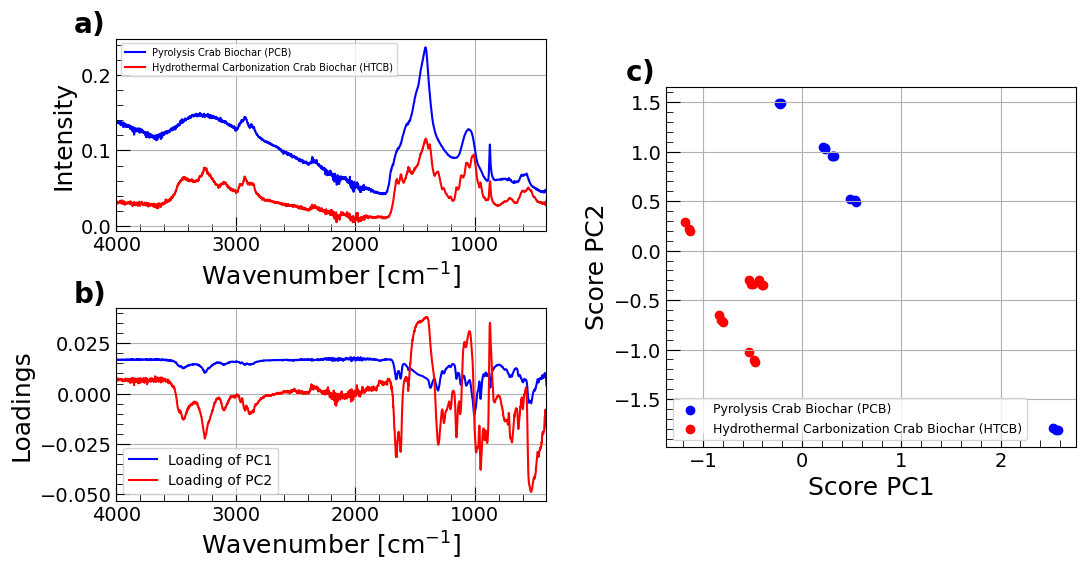

In [75]:
# Define marker styles and colors
marker_styles = ['o', '^']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Create figure with gridspec
fig9 = plt.figure(constrained_layout=False, figsize=(10, 6))  # Adjusted figure size
gs1 = fig9.add_gridspec(nrows=2, ncols=1, left=0.02, right=0.45, wspace=0.2, hspace=0.4)  # Left plots
gs2 = fig9.add_gridspec(nrows=1, ncols=1, left=0.57, right=0.98, top=0.80, bottom=0.20)  # Right plot

# Left plots
f9_ax1 = fig9.add_subplot(gs1[0, :])
f9_ax2 = fig9.add_subplot(gs1[1, :])

# Right plot
f9_ax3 = fig9.add_subplot(gs2[0, :])

# Plot Loadings of PC1 and PC2 for subplot a)
f9_ax2.plot(df19['wavenumber'][::1], df19['loading_pc1'][::1], color='blue', label="Loading of PC1")
f9_ax2.plot(df19['wavenumber'][::1], df19['loading_pc2'][::1], color='red', label="Loading of PC2")
f9_ax2.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax2.set_ylabel('Loadings', fontsize=18)
f9_ax2.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax2.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax2.minorticks_on()  # Enable minor ticks
f9_ax2.legend(fontsize=10)
f9_ax2.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax2.grid(True)
f9_ax2.set_xlim(4000, 400)
f9_ax2.text(-0.1, 1, r'$\mathbf{a)}$', transform=f9_ax1.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Plot Raw and Biochar Intensity for subplot b)
f9_ax1.plot(df14['wavenumber'][::1], df14['intensity'][::1], color='blue', label="Pyrolysis Crab Biochar (PCB)")
f9_ax1.plot(df21['wavenumber'][::1], df21['intensity'][::1], color='red', label="Hydrothermal Carbonization Crab Biochar (HTCB)")
f9_ax1.set_xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
f9_ax1.set_ylabel('Intensity', fontsize=18)
f9_ax1.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax1.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax1.minorticks_on()  # Enable minor ticks
f9_ax1.legend(fontsize=7, loc='upper left')
f9_ax1.invert_xaxis()  # Invert x-axis to go from 4000 to 400
f9_ax1.grid(True)
f9_ax1.set_xlim(4000, 400)
f9_ax1.text(-0.1, 1, r'$\mathbf{b)}$', transform=f9_ax2.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

# Define marker styles and colors
marker_styles = ['o']  # you can add more marker styles if needed
colors = ['blue', 'red']  # you can add more colors if needed

# Group samples by name and plot them with the same shape and color for each group
color_label_mapping = {'red': 'Hydrothermal Carbonization Crab Biochar (HTCB)', 'blue': 'Pyrolysis Crab Biochar (PCB)'}
unique_samples = df20['sample'].unique()
num_samples = len(unique_samples)
for i, sample_name in enumerate(unique_samples):
    sample_data = df20[df20['sample'] == sample_name]
    marker = marker_styles[i % len(marker_styles)]  # Cycle through marker styles
    color = colors[i % len(colors)]  # Cycle through colors
    label = color_label_mapping.get(color, f'Label for {color.capitalize()}')  # Default label based on color
    f9_ax3.scatter(sample_data['score_pc1'], sample_data['score_pc2'], label=label, color=color, marker=marker)

f9_ax3.set_xlabel('Score PC1', fontsize=18)
f9_ax3.set_ylabel('Score PC2', fontsize=18)
f9_ax3.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
f9_ax3.tick_params(axis='both', which='minor', length=5, direction='in')
f9_ax3.minorticks_on()  # Enable minor ticks
f9_ax3.legend(fontsize=9, loc='lower left')
f9_ax3.grid(True)
f9_ax3.text(-0.1, 1.0, r'$\mathbf{c)}$', transform=f9_ax3.transAxes, fontsize=20, va='bottom', ha='left', weight='bold')

plt.savefig('Method PC Loadings + Score for Carb Biochar 3D.pdf', dpi=600, bbox_inches='tight')
plt.savefig('Method PC Loadings + Score for Carb Biochar 3D.jpg', dpi=600, bbox_inches='tight')

plt.show()


### Intensity Analysis

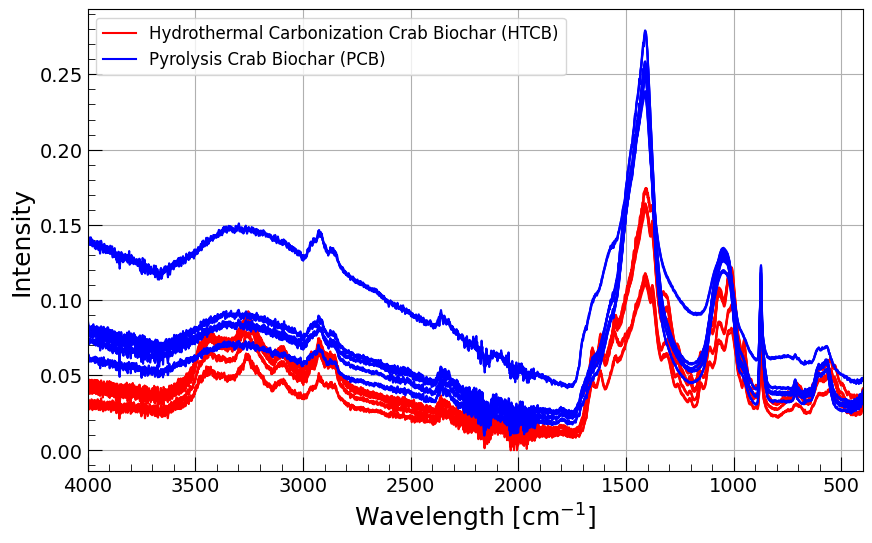

In [76]:
# Directories containing CSV files
directory1 = "/home/vikentiy/RStudio Data/Hydrothermal Carbonization Biochar (HCB)/csv"
directory2 = "/home/vikentiy/RStudio Data/Crab Biochar (CB)/csv"

# Create a single figure
plt.figure(figsize=(10, 6))

# Plotting for directory 1
files_in_dir1 = os.listdir(directory1)
if files_in_dir1:
    filepath = os.path.join(directory1, files_in_dir1[0])
    # Read the first file to use for label
    dHCB = pd.read_csv(filepath)
    # Plot first column vs second column with unique color and label for directory 1
    plt.plot(dHCB.iloc[:, 0], dHCB.iloc[:, 1], linestyle='-', label="Hydrothermal Carbonization Crab Biochar (HTCB)", color='red')

for idx, file in enumerate(files_in_dir1[1:]):
    filepath = os.path.join(directory1, file)
    # Read CSV file
    dHCB = pd.read_csv(filepath)
    # Plot first column vs second column with unique color and no additional label
    plt.plot(dHCB.iloc[:, 0], dHCB.iloc[:, 1], linestyle='-', color='red')

# Plotting for directory 2
files_in_dir2 = os.listdir(directory2)
if files_in_dir2:
    filepath = os.path.join(directory2, files_in_dir2[0])
    # Read the first file to use for label
    dCB = pd.read_csv(filepath)
    # Plot first column vs second column with unique color and label for directory 2
    plt.plot(dCB.iloc[:, 0], dCB.iloc[:, 1], linestyle='-', label="Pyrolysis Crab Biochar (PCB)", color='blue')

for idx, file in enumerate(files_in_dir2[1:]):
    filepath = os.path.join(directory2, file)
    # Read CSV file
    dCB = pd.read_csv(filepath)
    # Plot first column vs second column with unique color and no additional label
    plt.plot(dCB.iloc[:, 0], dCB.iloc[:, 1], linestyle='-', color='blue')

plt.xlabel("Wavelength [cm$^{-1}$]", fontsize=18)
plt.ylabel("Intensity", fontsize=18)
plt.gca().invert_xaxis() 
plt.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
plt.tick_params(axis='both', which='minor', length=5, direction='in')
plt.minorticks_on()  # Enable minor ticks
plt.xlim(4000, 400)

plt.grid(True)

# Add legend
plt.legend(fontsize=12)  
plt.savefig('Overlayed_Spectra.pdf', dpi=600, bbox_inches='tight')
plt.show()

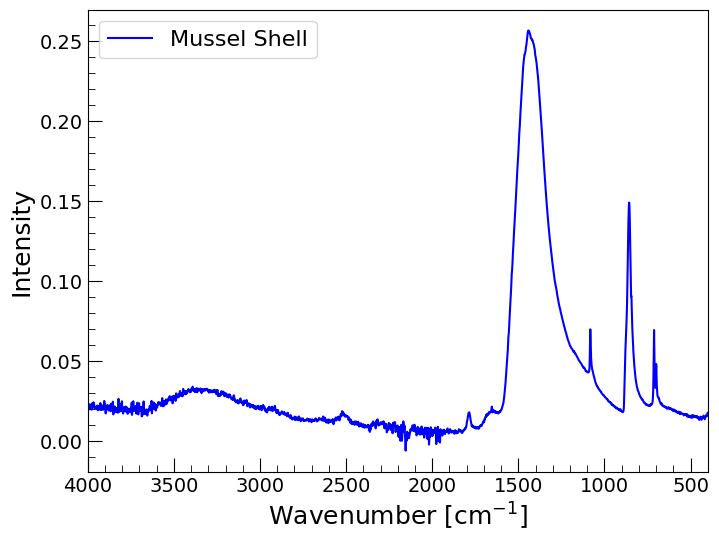

In [86]:
# Load the data
file_path = "/home/vikentiy/RStudio Data/Mussels/MusselShell1"
data = pd.read_csv(file_path)

# Extract wavenumber and intensity columns
wavenumber = data.iloc[:, 0]
intensity = data.iloc[:, 1]

plt.figure(figsize=(8, 6))

# Plot the data
plt.plot(wavenumber, intensity, linestyle='-', color='blue', label='Mussel Shell')

# Add labels and title
plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.gca().invert_xaxis() 
plt.tick_params(axis='both', which='major', labelsize=14, length=10, direction='in')
plt.tick_params(axis='both', which='minor', length=5, direction='in')
plt.minorticks_on()  # Enable minor ticks
plt.xlim(4000, 400)

# Add legend
plt.legend(fontsize=16, loc='upper left')  

# Show plot
plt.savefig('simple_spectra.pdf', dpi=60000, bbox_inches='tight')
plt.show()